# Intro to Matlab

As a demo of the language, plot sin and cos on the same axis:

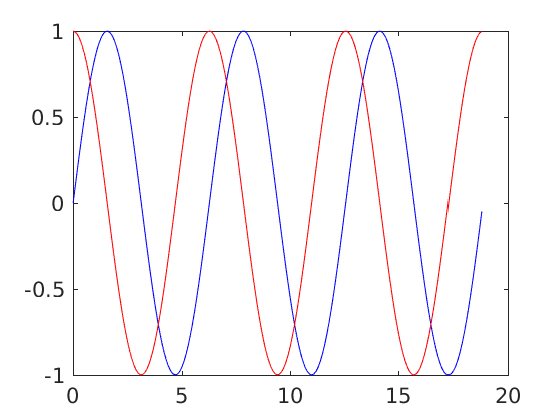

In [1]:
% define an array from 0 to 6*pi with steps of 0.1 using start:by:end
x = 0:0.1:6*pi;

% plot the sin of these points
plot(x, sin(x), 'b');

% keep the plot open
hold on;

% plot the cos of the points
plot(x, cos(x), 'r')

# Netcdf

Matlab comes with native netcdf capability. If you know the url of the dataset that you are interested in, you can display all the info about that datset using **ncdisp(data_url)** or **ncdisp(data_url, variable)** to look at just one variable.

In [2]:
data_url = 'http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc';
variable = 'AirTC_Avg';
ncdisp(data_url)

Source:
           http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc
Format:
           classic
Global Attributes:
           featureType  = 'timeSeries'
           history      = 'Created 2016-02-19 18:16:35.355123'
           description  = 'Butler Green Roof Station'
           Conventions  = 'CF-1.6'
           coordinates  = 'lat station_name lon'
           DODS.strlen  = 6
           DODS.dimName = 'string6'
Dimensions:
           maxStrlen64 = 64
           time        = 25494
Variables:
    AirTC_2_Avg            
           Size:       25494x1
           Dimensions: time
           Datatype:   double
           Attributes:
                       units  = 'Deg C'
                       method = 'Avg'
    AirTC_Avg              
           Size:       25494x1
           Dimensions: time
           Datatype:   double
           Attributes:
                       units  = 'Deg C'
                       method = 'Avg'
    Albedo_1_Avg         

At this point you haven't pulled over any actual data, to do that you use **ncread(data_url, variable)**. To read data attributes, use **ncreadatt(data_url, variable, attribute_name)**.

In [3]:
AirTData  = ncread(data_url, variable);
AirTUnits = ncreadatt(data_url, variable, 'units');

In [4]:
timeData = ncread(data_url, 'time');
timeUnits = ncreadatt(data_url, 'time', 'units');

In this NetCDF file the time units tell us that time is stored as seconds since 1970-01-01. That time format is often called POSIX time. To convert to a more legible time format, we can use the **datetime** function:

In [5]:
% convert time to a vector of datetimes
time = datetime( timeData, 'ConvertFrom', 'posixtime' );

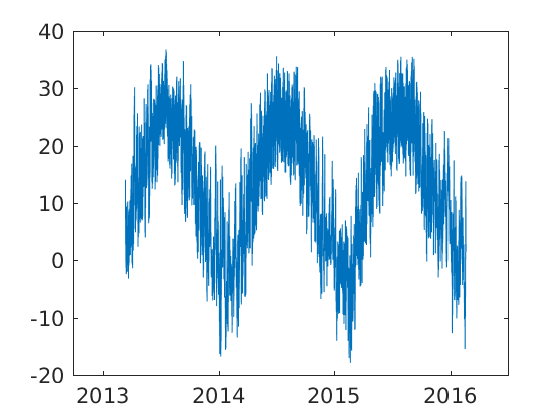

In [6]:
plot(time, AirTData)

We often are more interested in looking at one particular time, rather than the whole record. One way to slice the dataset along the time dimension in matlab is by creating a timeseries. 

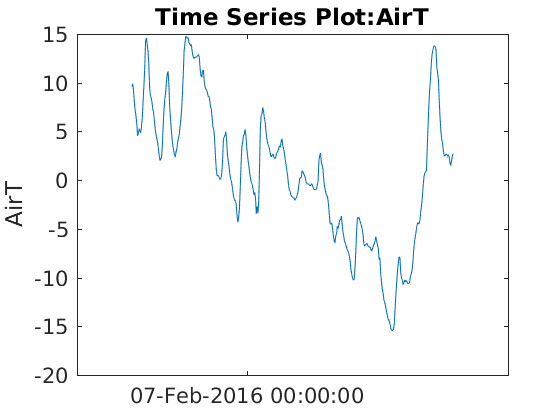

In [8]:
% define a timeseries (data, time as datestring, 'Name', variable name)
ts = timeseries(AirTData, datestr(time), 'Name', 'AirT');

% slice the timeseries with a start and end date, then set the name again
ts1 = getsampleusingtime(ts,'2016-02-01','2016-02-29');
set(ts1, 'Name', 'AirT')

% plot the February data
plot(ts1)

To plot several variables over a defined period of time, we can use a list of variables, and a slice of time. If we want to save time by not reading in all of the data unnecessarily, we can find the indexers for the times that we are interested in. Then we can grab just the data for the timespan of interest

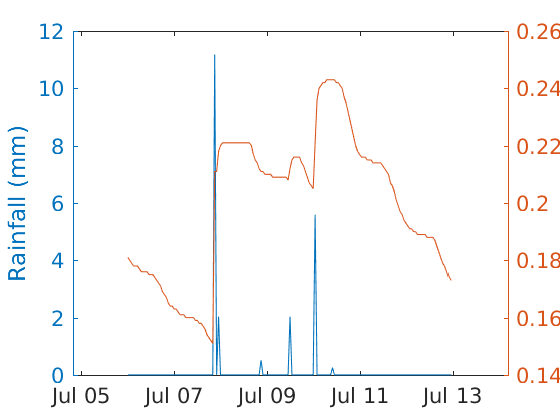

In [53]:
start = find(time=='2015-07-06');
count = find(time=='2015-07-13')-start;

Rain = ncread(data_url,'Rain_mm_3_Tot', start, count, 1);
VW = ncread(data_url,'VW', start, count, 1);
t = time(start:start+count-1);

[ax,p1,p2] = plotyy(t, Rain, t, VW);

ylabel(ax(1),'Rainfall (mm)') % label left y-axis
ylabel(ax(2),'Void Water (%)') % label right y-axis